# SelfStudySession C for Softwaredesign MA 2025

## C.1 UML Facts

### C.1.1 UML Questions

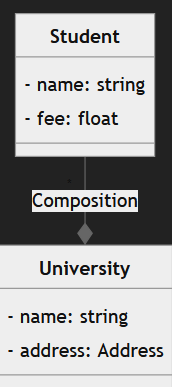

Which of the following can be answered with Yes and which with No:
1. No two universities can have the same name? -> No
2. A university and a student can not have the same name? -> No
3. No student studies at more than one university? -> No
4. Each student studies at at least one university? -> Yes
5. Two students with the same name can not study at the same university? -> No
6. Two students with the same name can not study at different universities? -> No
7. Two universities can have the same address? -> No

Is there a way to specify a attribute in UML as unique? -> Yes the unique modifier 

## B.2 From text to UML

### C.2.1 Convert the following description into an appropriate UML diagram, with multiplicities and associations.

- Every person has a name, a phone number and an e-mail address.
- Every address is only occupied by one person, some addresses might have no inhabitant.
- Each address is associated with a street, a city, an area code, and a country.
- Addresses can be verified as a home address for a person and printed for post service.
- There are two types of persons:
  - Students that can enlist for a class
  - Professors that can receive a salary
- A student has a study ID and an average grade.


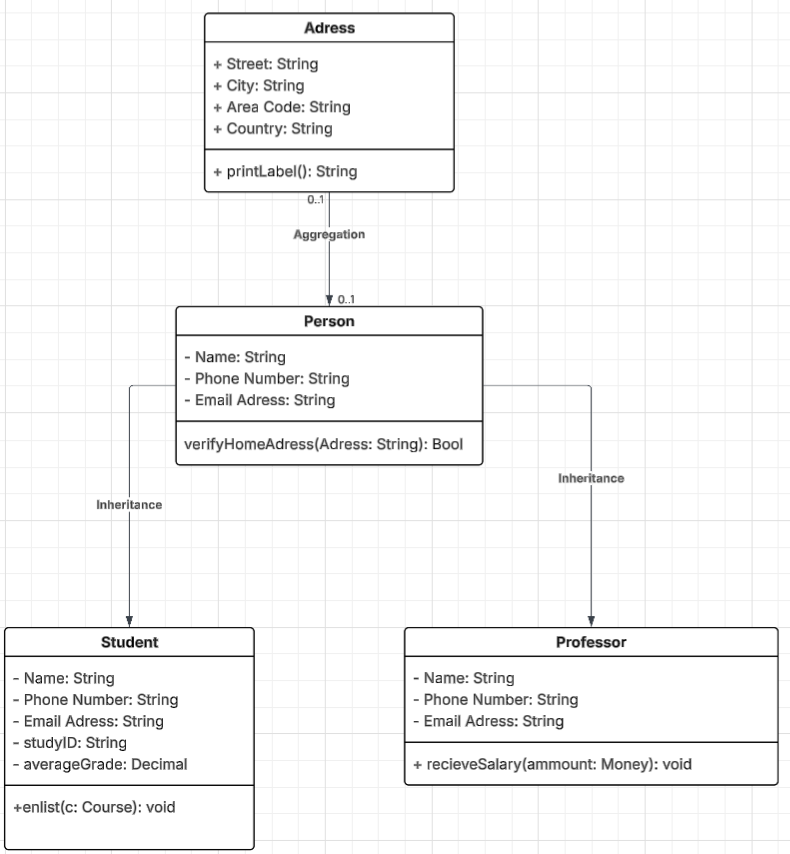

## C.3 From UML to Python

### C.3.1 Convert the UML diagram from **Exercise C.2** into Python code and test your classes.

In [2]:
class Adress():
    def __init__(self, street, city, area_code, country):
        self.street = street
        self.city = city
        self.area_code = area_code
        self.country = country

    def print_for_post_service(self):
        return f"{self.street}, {self.area_code} {self.city}, {self.country}"
    
class Person():
    def __init__(self, name, phone_number, email, address=None):
        self.name = name
        self.phone_number = phone_number
        self.email = email
        self.address = address

    def verify_home_address(self):
        if self.address:
            return f"{self.name}'s home address is: {self.address.print_for_post_service()}"
        else:
            return f"{self.name} has no registered address."
        
class Student(Person):
    def __init__(self, name, phone_number, email, study_id, average_grade, address=None):
        super().__init__(name, phone_number, email, address)
        self.study_id = study_id
        self.average_grade = average_grade

    def enlist_for_class(self, class_name):
        return f"Student {self.name} has enlisted for the class: {class_name}"
    
class Professor(Person):
    def __init__(self, name, phone_number, email, salary, address=None):
        super().__init__(name, phone_number, email, address)
        self.salary = salary

    def receive_salary(self):
        return f"Professor {self.name} has received a salary of {self.salary}."
    
# Example usage:
home_address = Adress("123 Main St", "Springfield", "12345", "USA")
student = Student("Alice", "555-1234", "alice@example.com", "S123", 3.8, home_address)
print(student.verify_home_address())
print(student.enlist_for_class("Math 101"))

prof_address = Adress("456 Elm St", "Springfield", "12345", "USA")
professor = Professor("Dr. Smith", "555-5678", "dr.smith@example.com", 75000, prof_address)
print(professor.verify_home_address())
print(professor.receive_salary())




Alice's home address is: 123 Main St, 12345 Springfield, USA
Student Alice has enlisted for the class: Math 101
Dr. Smith's home address is: 456 Elm St, 12345 Springfield, USA
Professor Dr. Smith has received a salary of 75000.


## C.4 Interface

### C.4.1 Consider the following UML diagram and implement it in Python with interfaces. Set *lives* for a Cat to the appropriate *9*, feed some cat food generated with random integers uniformly distributed between -10 and 10 and look how much food it can eat until it dies. Plot this for different initial values of *currentFood*.

In [10]:
import random

class Animal:
    def __init__(self, lives: int, currentFood: int):
        self.lives = lives
        self.currentFood = currentFood
    
    def eat(self, food: int) -> int:
        if self.lives > 0:
            self.currentFood += food
            if self.currentFood < 0:
                self.lives -= 1
                self.currentFood = 0
        return self.currentFood
    
class Cat(Animal):
    def __init__(self, lives: int, currentFood: int):
        super().__init__(9, currentFood)
        self.lives = 9
    
    def getLivesLeft(self):
        return self.lives
    
    def getCurrentAmmountofFood(self):
        return self.currentFood
    
    def decreaseLives(self):
        self.lives -= 1
        return self.lives
    
def cattorture(Cat: Cat):
    food_history = []
    while Cat.getLivesLeft() > 0:
        food = random.randint(-10, 10)
        Cat.eat(food)
        food_history.append((Cat.getCurrentAmmountofFood(), Cat.getLivesLeft()))
    return food_history

print(f"Cat survived for {len(cattorture(Cat(9, 5)))} iterations")


Cat survived for 4064 iterations


## C.5 Iterators

### C.5.1 Explain the output of the following code fragment, see **Section 6.1**:

In [11]:
square = lambda a: a ** 2
iterator = map(square, range(1, 5))

for i in iterator:
    print(i)

print(f"{list(iterator) = }")
iterator = map(square, range(1, 5))
print(f"{list(iterator) = }")

1
4
9
16
list(iterator) = []
list(iterator) = [1, 4, 9, 16]


Iterators are exhausted after used in a loop. Thus first list is empty, map stores the results in a list. List is then printed

## C.6 Accumulator

### C.6.1 In Section 6.1 we discussed the *functools* module. On function included there is *accumulate* that takes an iterator and a function to apply to it. It can, for example be used to compute partial sum or product:

In [3]:
from itertools import accumulate
from operator import add, mul

print(f"{list(accumulate([1, 2, 3, 4, 5], add)) = }")
print(f"{list(accumulate([1, 2, 3, 4, 5], mul)) = }")

list(accumulate([1, 2, 3, 4, 5], add)) = [1, 3, 6, 10, 15]
list(accumulate([1, 2, 3, 4, 5], mul)) = [1, 2, 6, 24, 120]


Use it for the following tasks:

1. Compute a running maximum in a list of numbers.

In [1]:
from itertools import accumulate

numbers = [3, 1, 5, 3, 9, 5]
max = accumulate(numbers, max)
print(f"{list(max) = }")


list(max) = [3, 3, 5, 5, 9, 9]


2. Compute an amortization schedule for a loan of 1000 with an interest of 5% and a payment of 100 for 10 years. Hint: You can provide an initial value as third argument to accumulate and the result should look something like the following:

In [13]:
[1000, 950, 898, 843, 785, 724, 660, 593, 523, 449, 371]

[1000, 950, 898, 843, 785, 724, 660, 593, 523, 449, 371]

In [6]:
from itertools import accumulate, repeat

P = 1000       # principal
r = 0.05       # 5% interest per period (here: per year)
pay = 100      # payment per period
n = 10         # number of periods (years)

def step(prev, _):
    # apply interest, then subtract payment
    return prev * (1 + r) - pay

schedule = [round(x) for x in accumulate(repeat(None, n), step, initial=P)]
print(schedule)
# -> [1000, 950, 898, 843, 785, 724, 660, 593, 523, 449, 371]


[1000, 950, 898, 842, 784, 724, 660, 593, 523, 449, 371]


Feel free to add account fees to make it more realistic.

In [ ]:
from itertools import accumulate, repeat

P        = 1000   # principal loan amount
r        = 0.05   # 5% interest per year
pay      = 100    # payment per year
fee_fixed = 20    # fixed account fee per year
n        = 10     # number of years

# 1) Fee is extra (not taken from payment, only extra cost to the customer)
def step_fee_extra(prev, _):
    return prev * (1 + r) - pay

# 2) Fee is within the fixed €100 payment (reduces what goes toward principal)
def step_fee_within(prev, _):
    return prev * (1 + r) - (pay - fee_fixed)

sched_extra  = [round(x, 2) for x in accumulate(repeat(None, n), step_fee_extra,  initial=P)]
sched_within = [round(x, 2) for x in accumulate(repeat(None, n), step_fee_within, initial=P)]

print("Fee extra (100 + 20):", sched_extra)
print("Fee within (100 total):", sched_within)


Fee extra (100 + 20): [1000, 950.0, 897.5, 842.38, 784.49, 723.72, 659.9, 592.9, 522.54, 448.67, 371.11]
Fee within (100 total): [1000, 970.0, 938.5, 905.43, 870.7, 834.23, 795.94, 755.74, 713.53, 669.2, 622.66]


## C.7 Filter

### Use functional programming and in particular the filter function to:

- 1: Find all palindromes in a list of strings.

In [1]:
def isPalindrome(s: str) -> bool:
    fwd = s.lower()
    bwd = fwd[::-1]
    return fwd == bwd

stringlist = ["Anna", "Otto", "Hello", "Racecar", "Python", "Level"]
palindromes = list(filter(isPalindrome, stringlist))
print(palindromes)

['Anna', 'Otto', 'Racecar', 'Level']


- 2: Count the number of vowels in a string

In [2]:
def countvowels(s: str) -> int:
    vowels = "aeiouAEIOU"
    return sum(1 for char in s if char in vowels)

print(countvowels("Hello World"))

3


## C.8 Create a Module

###  Create your own module. The module should have the following functions:

- Provide doc strings for each of your methods and for the module itself

- For a given year, check wether its a leap year

In [ ]:
#Leap year is a year thats divisible by 4 but not 100 OR divisible by 400

def isLeapYear(year :int) -> bool:

    """Determine whether a year is a Gregorian leap year.

    Args:
        year (int): Year number (e.g., 2024).

    Returns:
        bool: True if leap year, otherwise False.

    Examples:
        >>> is_leap_year(2024)
        True
        >>> is_leap_year(1900)
        False
        >>> is_leap_year(2000)
        True
    """
    if((year % 4 == 0 and year % 100 != 0) or year % 400 == 0):
        return True
    else:
        return False
    

print(isLeapYear(2024))  # True
print(isLeapYear(1900))  # False

True
False


- For a given date, return the day of the week, use the algorithm outlined [here](https://www.almanac.com/how-find-day-week): Hint: Dictionaries can help you for some of the mappings.

In [ ]:
#Described algorithm: 
#If year is less than 1753 it doesnt work properly

#Take last two digits of year
#last two digits * 1.25, continue with INT result (discard remainder)
#add to that day as INT and month number

# Month numbers:
# Jan = 1
# Feb = 4
# Mar = 4
# Apr = 0
# May = 2
# Jun = 5
# Jul = 0
# Aug = 3
# Sep = 6
# Oct = 1
# Nov = 4
# Dec = 6
#Leap year in Jan = 0
#Leap year in Feb = 3

#Divide sum by 7, remainder gives weekday
#1 = Sunday
#2 = Monday
#3 = Tuesday
#4 = Wednesday
#5 = Thursday
#6 = Friday
#7 = Saturday

#if year is before 1900 add 2 before dividing by 7
#if year is before 1800 add 4 before dividing by 7
#if year is after 2000 and before 2100 subtract 1 before dividing by 7

def dayOfWeek(day: int, month: int, year: int) -> str:
    """Calculate the day of the week for a given date using a specific algorithm."""
    if year < 1753:
        return "Algorithm does not work for years before 1753"
    
    month_values = { #Month number values as per algorithm
        1: 1,
        2: 4,
        3: 4,
        4: 0,
        5: 2,
        6: 5,
        7: 0,
        8: 3,
        9: 6,
        10: 1,
        11: 4,
        12: 6
    }

    day_values = { # Day of week values as per algorithm
        1: "Sunday",
        2: "Monday",
        3: "Tuesday",
        4: "Wednesday",
        5: "Thursday",
        6: "Friday",
        0: "Saturday"
    }

    last_two_digits = year % 100
    step1 = int(last_two_digits * 1.25)
    step2 = step1 + day + month_values[month]
    if isLeapYear(year) and (month == 1 or month == 2):
        step2 -= 1
    if year < 1900:
        step2 += 2
    if year < 1800:
        step2 += 2
    if year > 2000 and year <= 2100:
        step2 -= 1


    print(last_two_digits, step1, step2) #DEBUG

    test = step2 % 7
    print(test) #DEBUG


    result = day_values[step2 % 7]
    print(f"The day of the week for {day}/{month}/{year} is {result}.")

dayOfWeek(26, 1, 1999)



99 123 150
3
The day of the week for 26/1/1999 is Tuesday.


- Return the week number of the year of a certain date, you can use the algorithm outlined [here](https://www.geeksforgeeks.org/how-to-get-the-current-weeknumber-of-the-year/).

In [30]:
#formula described in link is basically days since Jan 1st/7 + weekstart offset -> Monday = offset 0

def calcWeekNr (day: int, month: int, year: int) -> int:
    """Calculate the week number for a given date."""
    # Month offsets for week number calculation

    # Calculate day of year
    day_of_year = day
    for m in range(1, month):
        if m in [1, 3, 5, 7, 8, 10, 12]:
            day_of_year += 31
        elif m in [4, 6, 9, 11]:
            day_of_year += 30
        elif m == 2:
            day_of_year += 29 if isLeapYear(year) else 28

    # Calculate week number
    week_number = (day_of_year // 7)
    return week_number

print(calcWeekNr(31, 12, 2024))  # 52


52


## C.9 Use your own module

### Use the module created in *Exercise C.8* and build a program on it.

- Include the local module via *pdm*
- Use the module to generate from a date the following output
    - leap year -> True/False
    - day of the week
    - week of the year
- How can you deal with european and american styled day-month-order?
- Update your module by adding the above described function where the returned value should be a dictionary with keys: leapyear, weekday, week.
- Can you use the new function in the module right away or do you need to reinstall it somehow?
